<pre>
Name: Ritika Sarkar 
Reg. No.: 19BAI1031 
Faculty: Dr. G. Suganya 
Slot: L3 + L4 
Course Code: CSE1015 
Date: 23.02.2021
</pre>

Link to dataset: https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility

Dataset: `Health Data on Heart Attack Possibility`

<h2>Logistic Regression</h2>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('heart.csv')

<h5>Data Analysis</h5>

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Attribute Information
1) age
2) sex
3) chest pain type (4 values)
4) resting blood pressure
5) serum cholestoral in mg/dl
6)fasting blood sugar > 120 mg/dl
7) resting electrocardiographic results (values 0,1,2)
8) maximum heart rate achieved
9) exercise induced angina
10) oldpeak = ST depression induced by exercise relative to rest
11)the slope of the peak exercise ST segment
12) number of major vessels (0-3) colored by flourosopy
13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14) target: 0= less chance of heart attack 1= more chance of heart attack
<h5>Source: Kaggle Link</h5>

In [5]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
data.shape

(303, 14)

In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<h5>Drawing Scatter Chart</h5>

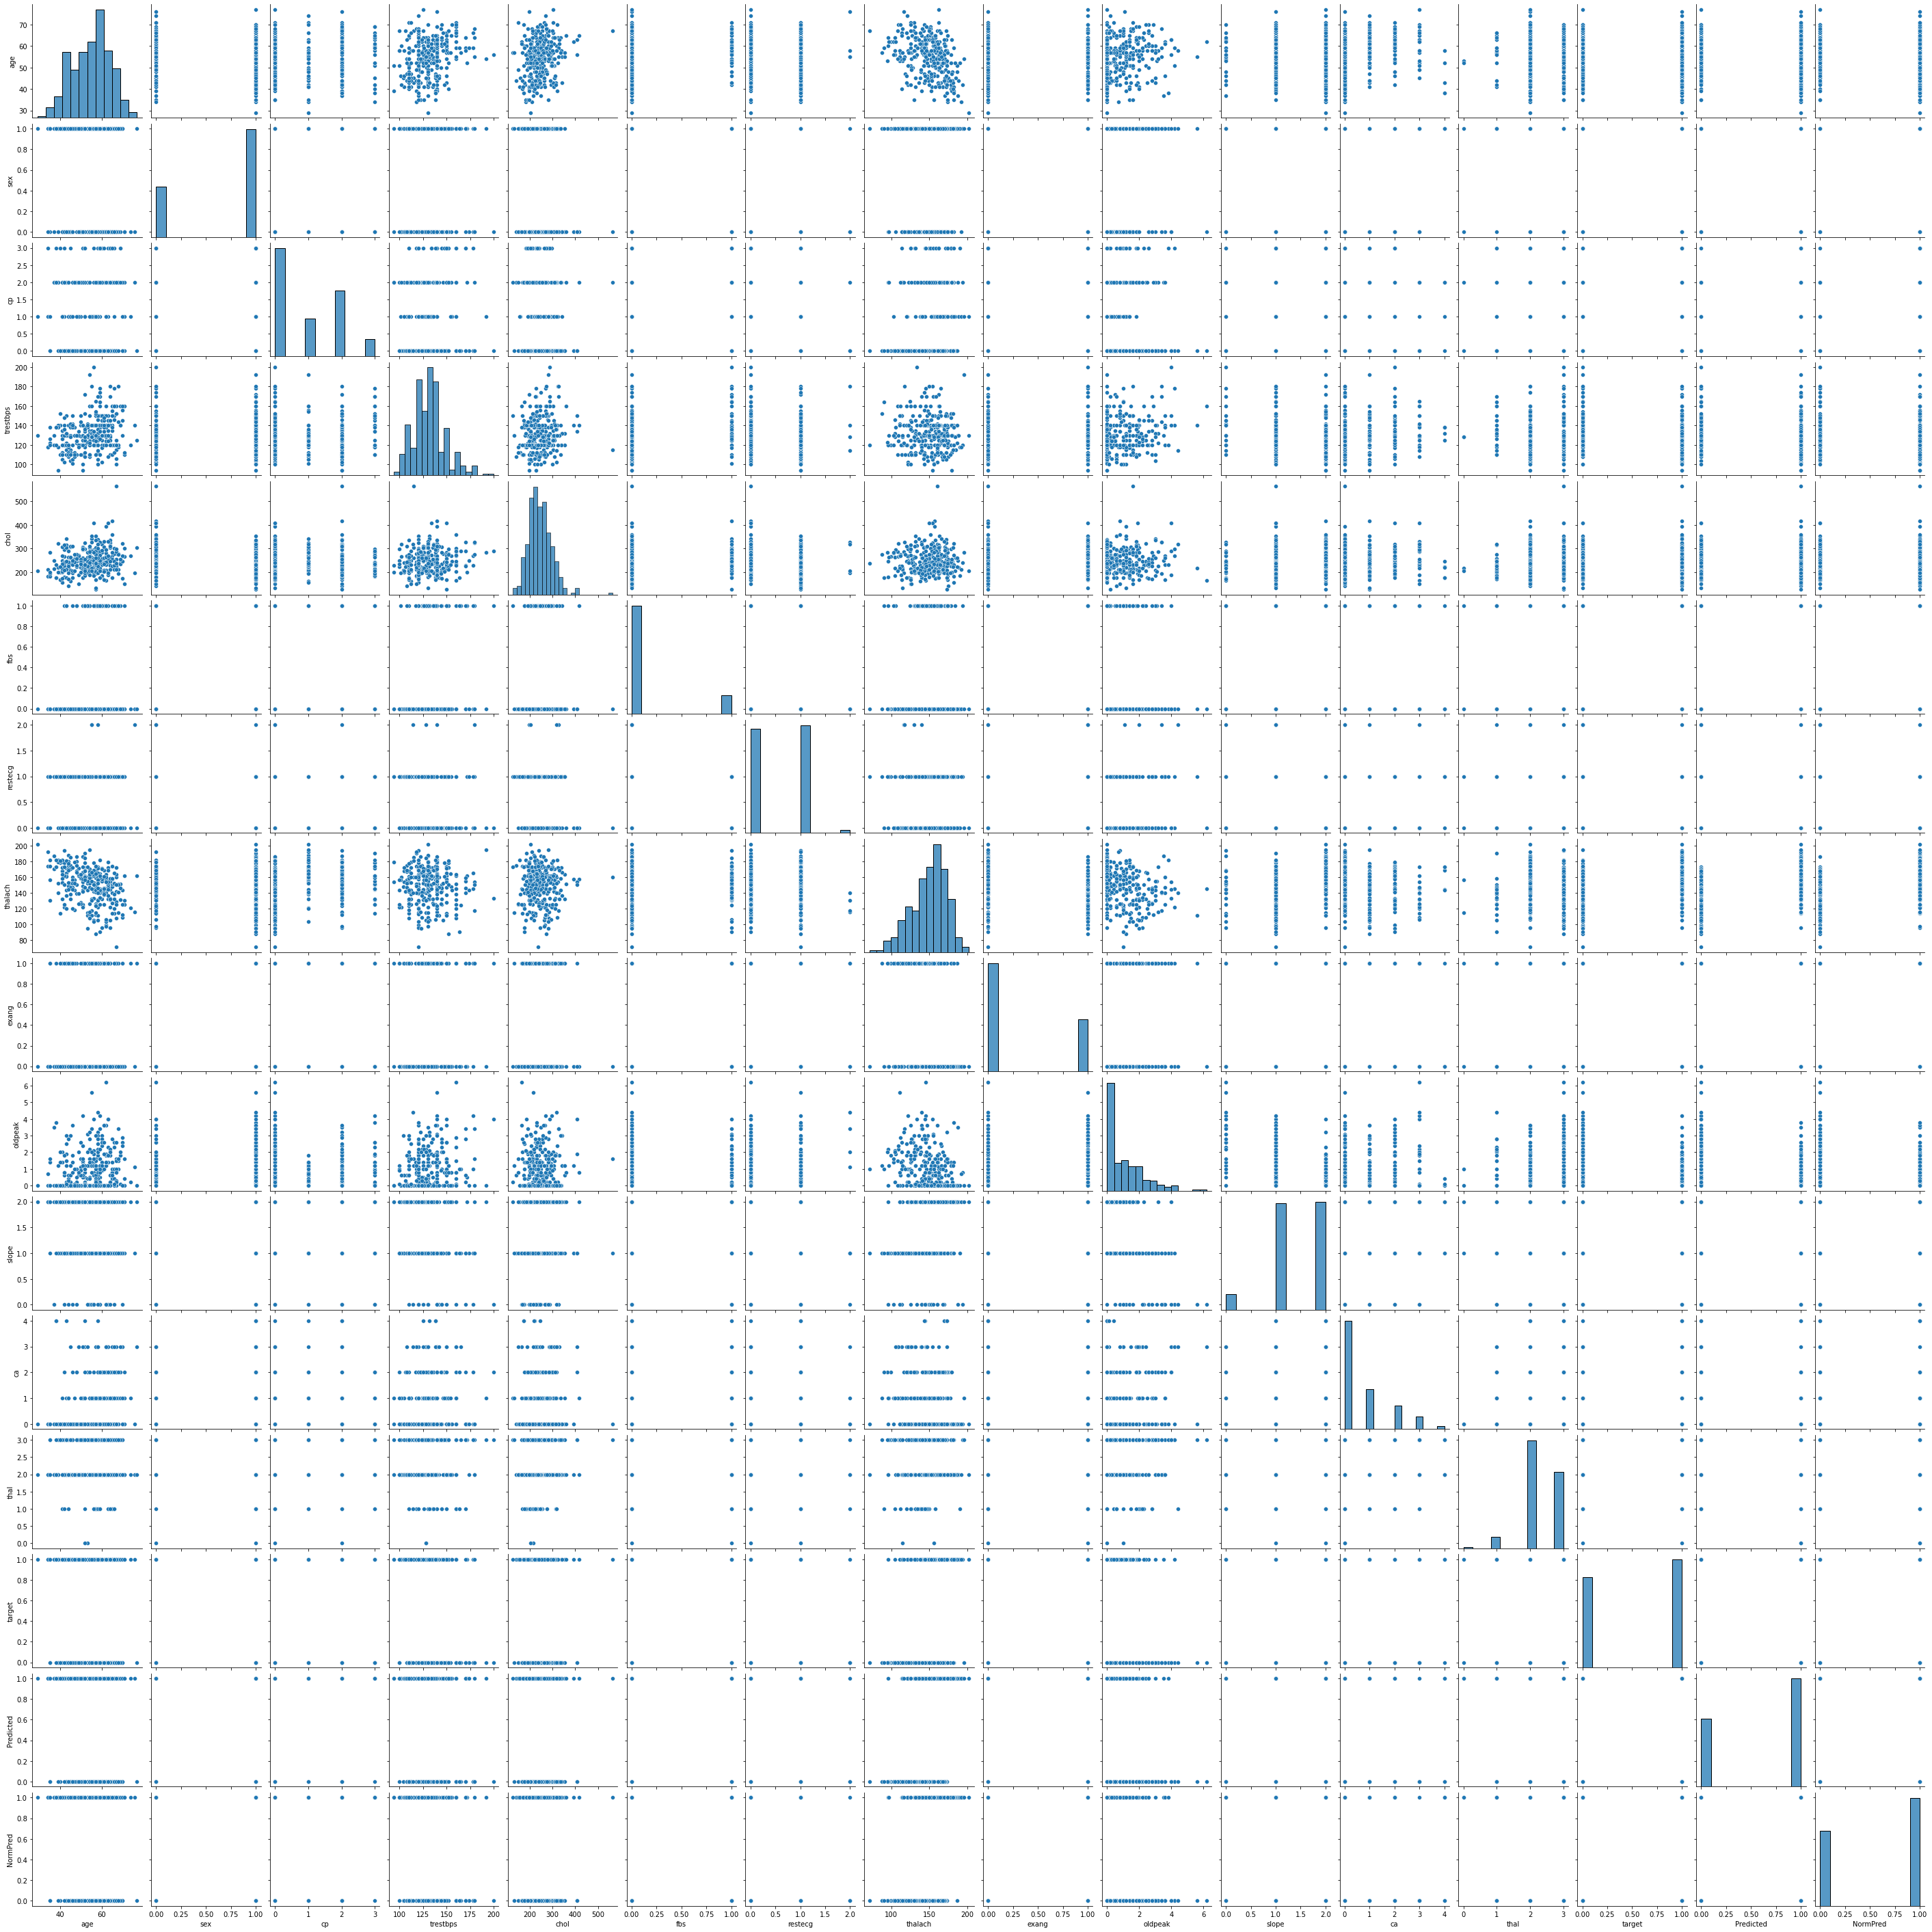

In [79]:
sns.pairplot(data)

Checking correlation using Heatmap

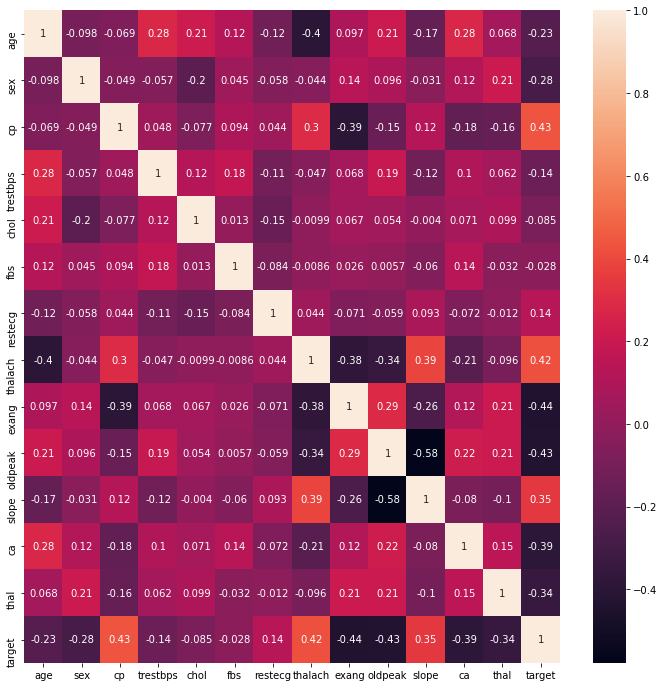

In [9]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True)

The correlation values don't reveal much because the target column is already categorical

<h5>Input columns</h5>

In [18]:
data.iloc[:,:-1] #taking all but the last column

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


<h5>Target column: target</h5>

In [25]:
data.iloc[:,13] #last column

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

Checking number of 1s and 0s in the 'target' column

In [77]:
data[data['target']==1].count()

age          165
sex          165
cp           165
trestbps     165
chol         165
fbs          165
restecg      165
thalach      165
exang        165
oldpeak      165
slope        165
ca           165
thal         165
target       165
Predicted    165
NormPred     165
dtype: int64

In [78]:
data[data['target']==0].count()

age          138
sex          138
cp           138
trestbps     138
chol         138
fbs          138
restecg      138
thalach      138
exang        138
oldpeak      138
slope        138
ca           138
thal         138
target       138
Predicted    138
NormPred     138
dtype: int64

<h5>Checking missing values in dataset</h5>

In [20]:
data.isnull().sum() #therefore no missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<h5>Training the model</h5>

In [26]:
#taking the entire dataset for training because its not that large in size
train_x = data.iloc[:,:-1]
train_y = data.iloc[:,13]

In [29]:
from sklearn import linear_model as lm
logistic = lm.LogisticRegression(solver='liblinear') #used due to an error faced which was caused due to the small size of the dataset
logistic.fit(train_x, train_y)

LogisticRegression(solver='liblinear')

<h5>Prediction</h5>

In [30]:
y_pred = logistic.predict(train_x)
data['Predicted'] = y_pred

In [31]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Predicted
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1


Straight Line Equation Intercept and Coefficients

In [43]:
print("Intercept: ",logistic.intercept_[0])
print("Coefficients: ",logistic.coef_[0])

Intercept:  0.406305826155246
Coefficients:  [ 0.0090944  -1.37749162  0.80280531 -0.01545769 -0.00328439 -0.00854151
  0.4618381   0.02942609 -0.78442689 -0.50854695  0.52011523 -0.7302751
 -0.80610944]


<h5>Graphical Visualisation</h5>

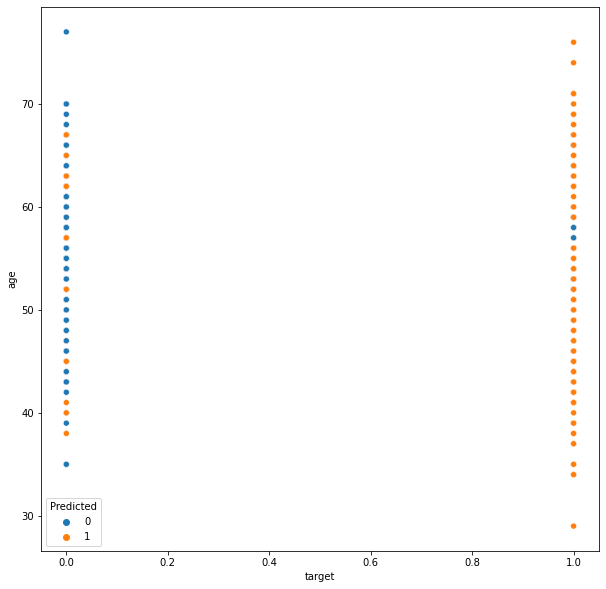

In [74]:
plt.figure(figsize=(10,10))
#comparing predicted results with target column
sns.scatterplot(x=data['target'], y=data['age'], hue='Predicted', data=data)

<h5>Error metrics</h5>

In [46]:
from sklearn.metrics import accuracy_score
print("Accuracy Score", accuracy_score(train_y, y_pred))

Accuracy Score 0.8514851485148515


In [48]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix")
print(confusion_matrix(train_y, y_pred))

Confusion matrix
[[105  33]
 [ 12 153]]


In [49]:
(105+153)/303 #accuracy by summing diagonal values and dividing by number of rows

0.8514851485148515

<h3>Normalisation using Minmax Scaler</h3>

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
norm_x = scaler.fit_transform(train_x)

<h5>Training the model</h5>

In [59]:
from sklearn import linear_model as lm
Normlogistic = lm.LogisticRegression(solver='liblinear')
Normlogistic.fit(norm_x, train_y)

LogisticRegression(solver='liblinear')

<h5>Prediction</h5>

In [63]:
y_normpred = Normlogistic.predict(norm_x)

In [75]:
data['NormPred'] = y_normpred
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Predicted,NormPred
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,1


Straight Line Equation Intercept and Coefficients

In [61]:
print("Normalised Intercept: ",Normlogistic.intercept_[0])
print("Normalised Coefficients: ",Normlogistic.coef_[0])

Normalised Intercept:  0.9275850389401162
Normalised Coefficients:  [-0.39386435 -1.23728169  1.92307351 -0.80490861 -0.40904276  0.07247093
  0.69287062  1.71658667 -0.97468083 -1.58077381  1.29884973 -2.06907642
 -1.42573063]


<h5>Graphical visualisation</h5>

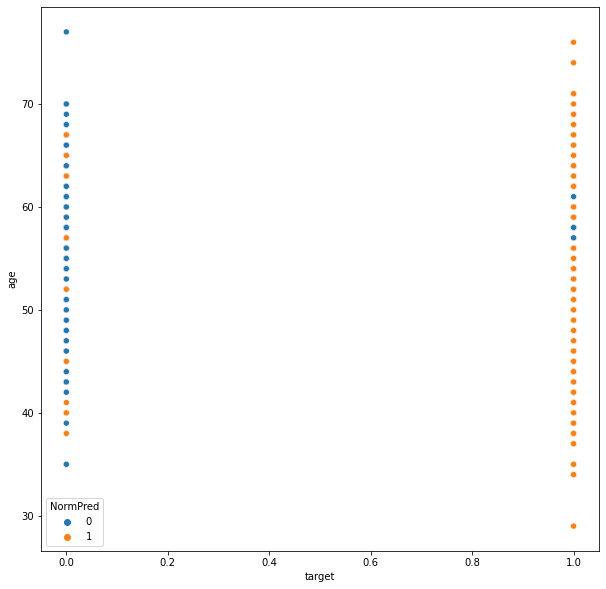

In [76]:
plt.figure(figsize=(10,10))
#comparing predicted results with target column
sns.scatterplot(x=data['target'], y=data['age'], hue='NormPred', data=data)

<h5>Error metrics</h5>

In [65]:
print("Normalised Accuracy Score", accuracy_score(train_y, y_normpred))

Normalised Accuracy Score 0.8415841584158416


In [67]:
print("Confusion matrix")
print(confusion_matrix(train_y, y_normpred))

Confusion matrix
[[107  31]
 [ 17 148]]


### Comparing the Second Prediction (having normalised input) with the First Prediction

In [68]:
print("Accuracy Score", accuracy_score(train_y, y_pred))
print("Normalised Accuracy Score", accuracy_score(train_y, y_normpred))

Accuracy Score 0.8514851485148515
Normalised Accuracy Score 0.8415841584158416


We can see that the normalised accuracy score is lesser than that of the original accuracy score. The reason could be that the variation in values among the dataset columns may not have been that large. Hence,we conclude that the original model fits the data better.

Therefore, Logistic Regression gave us a fairly good accuracy score of 85.15%. Hence, upon being given a new observation, we may be able to predict the presence of heart disease in that person with 85.15% accuracy.